In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import plot_model
from keras.datasets import mnist

In [0]:
num_classes = 10

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [0]:
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                46090     
Total params: 65,194
Trainable params: 65,194
Non-trainable params: 0
__________________________________________________

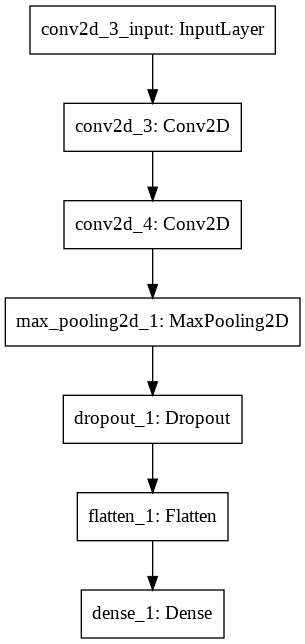

In [10]:
plot_model(model, to_file='model.png')

In [0]:
epochs = 12

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
import numpy as np
from keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 27s 445us/step - loss: 11.2587 - acc: 0.3004 - val_loss: 9.9568 - val_acc: 0.3815
Epoch 2/12
60000/60000 [==============================] - 19s 315us/step - loss: 8.3790 - acc: 0.4796 - val_loss: 8.1910 - val_acc: 0.4912
Epoch 3/12
60000/60000 [==============================] - 19s 312us/step - loss: 8.1579 - acc: 0.4935 - val_loss: 8.1028 - val_acc: 0.4970
Epoch 4/12
60000/60000 [==============================] - 19s 314us/step - loss: 8.1421 - acc: 0.4947 - val_loss: 8.1212 - val_acc: 0.4960
Epoch 5/12
60000/60000 [==============================] - 19s 313us/step - loss: 8.1190 - acc: 0.4961 - val_loss: 8.1205 - val_acc: 0.4961
Epoch 6/12
60000/60000 [==============================] - 19s 311us/step - loss: 8.1734 - acc: 0.4928 - val_loss: 8.0993 - val_acc: 0.4974
Epoch 7/12
60

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)

In [0]:
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

